本笔记对应《动手学深度学习》[第3章](https://tangshusen.me/Dive-into-DL-PyTorch/#/chapter03_DL-basics/3.1_linear-regression)

# 1. linear regression 手工实现

In [1]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:,1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32) #disturbances

In [3]:
print(features[0], labels[0])

tensor([-0.5982, -0.5677]) tensor(4.9353)


In [4]:
2*(-0.5982)+(-3.4)*(-0.5677)+4.2

4.9337800000000005

In [5]:
import d2lzh_pytorch

In [6]:
d2lzh_pytorch.set_figsize()

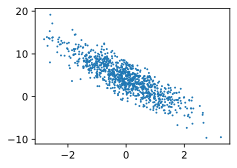

In [7]:
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

In [15]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)  # len()传入tensor,得到tensor.shape[0]
    indices = list(range(num_examples))
    random.shuffle(indices)  # inplace shuffle
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)  # 0:表示j指定第一维坐标（row index），j是row index的一维Tensor

torch.LongTensor()，也是一个Tensor, dtype=torch.long

In [16]:
batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.5852,  0.6459],
        [ 0.6758,  1.0734],
        [-0.6582,  1.5661],
        [ 1.3930,  0.6346],
        [ 0.9893, -0.6581],
        [-0.5578,  0.8349],
        [-0.5043,  0.3583],
        [-1.0075,  0.6002],
        [-1.4498,  0.7808],
        [-1.8464,  0.5039]]) tensor([ 0.8389,  1.8955, -2.4412,  4.8171,  8.4308,  0.2453,  1.9486,  0.1467,
        -1.3544, -1.1980])


In [19]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [21]:
w, b

(tensor([[-0.0036],
         [-0.0050]]),
 tensor([0.]))

In [22]:
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], requires_grad=True)

In [23]:
def linreg(X, w, b):
    return torch.mm(X, w) + b  # 定义forward propagate

In [24]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2  # 定义损失函数

In [25]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size  # 定义参数更新

In [30]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [31]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
    
        w.grad.data.zero_()  # 梯度清零tensor.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print("epoch %d, loss %f" % (epoch+1, train_l.mean().item()))

epoch 1, loss 0.031697
epoch 2, loss 0.000106
epoch 3, loss 0.000049


In [33]:
print(true_w, "\n", w)
print(true_b, '\b', b)

[2, -3.4] 
 tensor([[ 1.9996],
        [-3.3998]], requires_grad=True)
4.2  tensor([4.1997], requires_grad=True)


Tips:  
torch.utils.data模块提供了有关数据处理的工具；  
torch.nn模块定义了大量神经网络的层;  
torch.nn.init模块定义了各种初始化方法;  
torch.optim模块提供了很多常用的优化算法。